# Vectorizing 


A DL model doesn't understand letters , so we have to transform text into numeric tensors . 

The main steps of every algorithm are :  
1) Standardize the data by converting it to lowercase or removing punctuation
2) Split the text into small units : *tokens* . This is called <u>*tokenization*</u>  
3) Convert each token into a numerical vector . But we need to *index* all tokens before

*Here is a simple example*
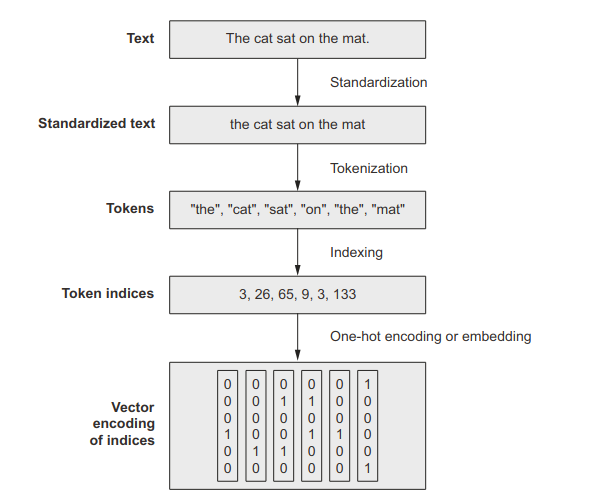

Let's implement our custom class that will do all of this !

In [18]:
import string
class Vectorizer:
    def standardize(self,text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)
    def tokenize(self,text):
        text = self.standardize(text)
        return text.split()
    def make_vocab(self,dataset):
        self.vocab = {"":0,"[UNK]":1}
        for sentance in dataset:
            sentance = self.standardize(sentance)
            tokens = self.tokenize(sentance)
            for token in tokens:
                if token not in self.vocab:
                    self.vocab[token] = len(self.vocab)
            self.inverse_vocab = dict((v,k) for k,v in self.vocab.items())
    def encode(self,sentance):
        sentance = self.standardize(sentance)
        tokens = self.tokenize(sentance)
        return [self.vocab.get(token,1) for token in tokens]
    def decode(self,int_sequence):
        return " ".join(self.inverse_vocab.get(i,"[UNK]") for i in int_sequence)

In [19]:
dataset = [
    "Hey my friend how are you",
    "The family is doing good",
    "Where you from my bro",
    "Stop the cap man"
]

vectorizer = Vectorizer()
vectorizer.make_vocab(dataset)

In [21]:
sentance_to_encode = "Hey saad how your family is doing man ?"
encoded_sentance = (vectorizer.encode(sentance=sentance_to_encode))
print(encoded_sentance)

[2, 1, 5, 1, 9, 10, 11, 18]


In [22]:
print(vectorizer.decode(encoded_sentance))

hey [UNK] how [UNK] family is doing man
